In [203]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [204]:
df = pd.read_csv('kc_house_data.csv', sep = ',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [205]:
df.isnull().sum() # There is no missing data 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [206]:
date=[]
for i in df["date"] :
  i = int(i[:6])
  date.append(i)
df["date"] = pd.Series(date)
df
 #we made a modification on the date columns so othat it becomes numerical 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,201410,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,201412,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,201502,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,201412,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,201502,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,201405,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,201502,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,201406,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,201501,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


None


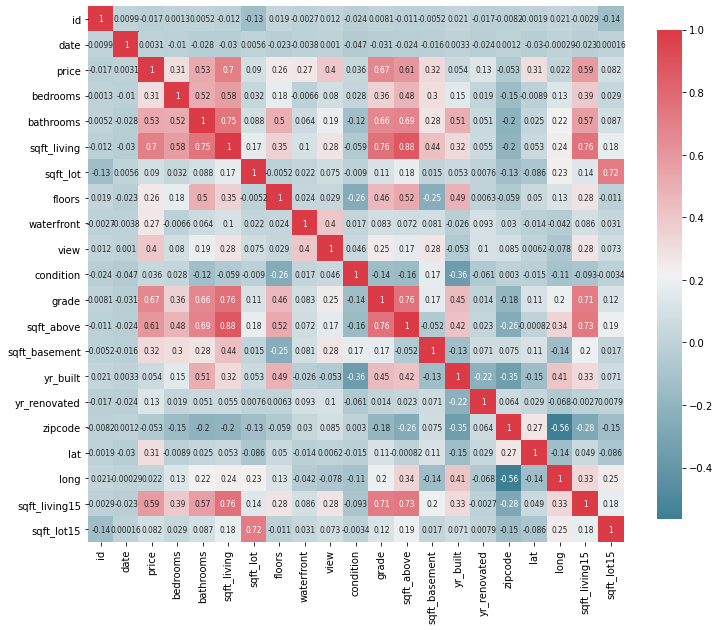

In [207]:
def plot_correlation_map( df ):# here we will use the correlation map to study the correlation between each feature and the price so we can select the most important ones 
    corr = df.corr()  
    s , ax = plt.subplots( figsize =( 12 , 10 ) ) 
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) 
    s = sns.heatmap( 
        corr,
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 },
        ax=ax, 
        annot = True,
        annot_kws = { 'fontsize' : 7.5 }

        )
print(plot_correlation_map(df))
# with this correlation map we can see the most important features (studying their correlation with the price) which are : 
# bedrooms , bathrooms , sfqt_living , floors , waterfront , view , grade , sqft_above , sqft_basement,lat, sqft_living15 
        

In [208]:

df.drop(["id","date","sqft_lot","condition","yr_built","yr_renovated","zipcode","long","sqft_lot15"], axis = 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


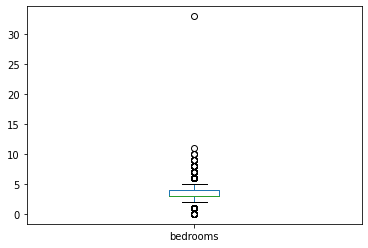

In [209]:
df["bedrooms"].plot.box() #we are using the box plot so we can detect the outliers 

In [210]:
df = df[(df['bedrooms']<11)] # we eliminated the outliers 

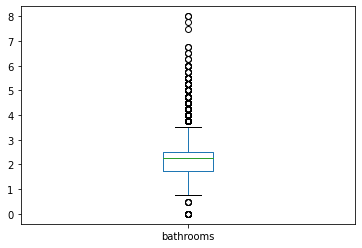

In [211]:
df["bathrooms"].plot.box() #we are using the box plot so we can detect the outliers 

In [212]:
df = df[(df['bathrooms']<7)] # we eliminated the outliers

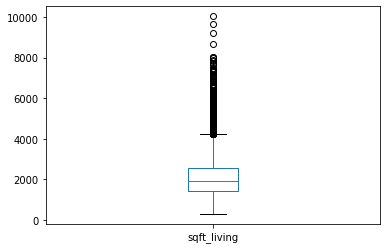

In [213]:
df["sqft_living"].plot.box()#we are using the box plot so we can detect the outliers 

In [214]:
df = df[(df['sqft_living']<11000)] # we eliminated the outliers
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


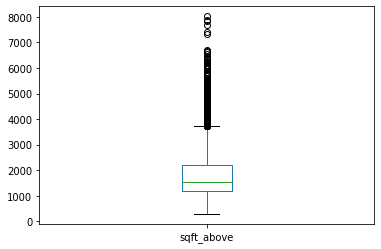

In [215]:
df["sqft_above"].plot.box()#we are using the box plot so we can detect the outliers
df

In [216]:
df = df = df[(df["sqft_above"]<8000)] #we eliminated the outliers
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


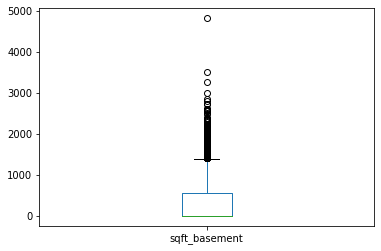

In [217]:
df["sqft_basement"].plot.box()#we are using the box plot so we can detect the outliers

In [218]:
df = df = df[(df["sqft_basement"]<4000)]# we eliminated the outliers
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [219]:
x = df.iloc[:,1:].values
y =df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30) 


In [220]:
x1 = df["sqft_living"].values[:,np.newaxis]
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=30)
model=LinearRegression()   # we are building linear regression model
model.fit(x1_train,y_train)  #we are fitting the training data
predicted=model.predict(x1_test) # we are testing our model’s performance


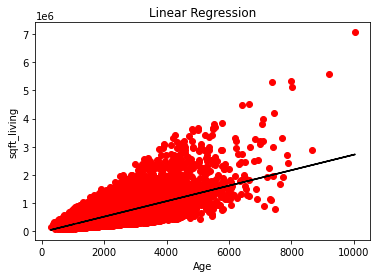

In [221]:
plt.scatter(x1,y,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_living")
plt.xlabel("Age")
plt.plot(x1,model.predict(x1),color="k")
plt.show()

In [222]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 67589264571.362595
R squared 0.48936050516079554


In [223]:
model1=LinearRegression() 
model1.fit(x_train,y_train) 
predicted=model1.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
# we can see that multilinear regression is more precised than the normal linear regresssion in this case ( r squared multilinear > r squared linear )

MSE 43500614542.5032
R squared 0.6713511831198349


In [224]:
model2=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
model2.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = model2.predict(x_test_fit)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
# we can see that polynominal regression is more precised than the multi linear regresssion in this case ( r squared polynominal > r squared multilinear )

MSE:  35328886648.55007
R squared:  0.7330889018270105
